# <CENTER> UNIVERSIDAD POLITECNICA SALESIANA </CENTER> 

### <CENTER>EXAMEN DE INTELIGENCIA ARTIFICIAL</CENTER> 

# 1. Desarrollar un juego (tema libre) empleando una de las 2 siguientes alternativas:
1.	easyAI
2.	Universe + GYM
El juego deberá implementar algún algoritmo de IA y de igual forma, generar un informe de movimientos, puntajes y quién gana la partida. Se debe tener un juego en donde se tenga un jugar humano y otro utilizando Inteligencia Artificial, finalmente no se puede repetir el juego por más de tres personas por lo que se debe publicar en el foro el juego seleccionado.

2. Dentro del juego el usuario puede registrar he ingresar los gustos de alguna área basadas en el lugar geográfico por ejemplo: comida, películas, lugares turísticos etc.

3. En base a la información proporcionada se deberá generar un sistema que permita mostrar lugares de interés, para ello tomar los datos de las tareas y pruebas dentro de una base de datos orientadas a grafos.

4. Realizar el sistema con una interfaz gráfica y almacenar los puntajes y datos de los usuarios o jugadores.

Código y documentos de entrega:  Se deberá entregar un informe con el procesos dentro del mismo tener capturas del uso del juego y generar un documento en PDF de validación y pruebas. Finalmente subir todo al repositorio incluido los códigos fuentes

Criterios de Evaluación:

•	Neo4J y Búsquedas : 30%

•	Juego IA: 30%

•	GUI: 20%

•	Informe PDF: 20%

•	Usabilidad: 10%


# Inteligencia Artificial que juega automáticamente a un juego de coches.

Gimnasio OpenAI

OpenAI Gym es un conjunto de herramientas para desarrollar y comparar algoritmos de aprendizaje por refuerzo. Esta es la biblioteca de código abierto del gimnasio, que le brinda acceso a un conjunto estandarizado de entornos, para su instalacion solo se ejecuta el siguiente comando: 

pip install gym






In [4]:
from __future__ import division
import pygame
import random
import time
from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from random import randint
import numpy as np
from keras.utils import to_categorical
import sys

pygame.init()

width = 800 + 800
height = 600
size = (width, height)
fps = 120
counter_games = 0
record = 0
count_episodes = 0

screen = pygame.display.set_mode(size)
clock = pygame.time.Clock()

font = pygame.font.Font('/Users/zhimi/Downloads/ia_car-master/fonts/cargo.ttf', 40)
score = pygame.font.Font('/Users/zhimi/Downloads/ia_car-master/fonts/cargo.ttf', 30)
font2 = pygame.font.Font('/Users/zhimi/Downloads/ia_car-master/fonts/cargo.ttf', 30)

background = pygame.image.load("/Users/zhimi/Downloads/ia_car-master/images/roadway.jpg")
backrect = background.get_rect()

carimg = pygame.image.load("/Users/zhimi/Downloads/ia_car-master/images/car.png")
car_width = 49

truckimg = pygame.transform.scale(pygame.image.load("/Users/zhimi/Downloads/ia_car-master/images/pickup.png"), (70, 145))


def avoided(count):
    scoreFont = score.render("Score: %d" % count, True, (0, 0, 0))
    screen.blit(scoreFont, (50, 570))


def print_record(record):
    scoreFont = score.render("Record: %d" % record, True, (0, 255, 0))
    screen.blit(scoreFont, (450, 570))


def print_epochs(count_episodes):
    scoreFont = score.render("Epochs: %d" % count_episodes, True, (255, 0, 0))
    screen.blit(scoreFont, (50, 10))


def print_training(train):
    if train:
        scoreFont = score.render("Training", True, (255, 255, 255))
    else:
        scoreFont = score.render("Playing", True, (255, 255, 255))
    screen.blit(scoreFont, (450, 10))


def truck(truck_x, truck_y):
    screen.blit(truckimg, (truck_x, truck_y))


def car(x, y):
    if x <= width // 2:
        screen.blit(carimg, (x, y))


def message2(x):
    messageFont2 = font.render("CHOCASTES", True, (0, 0, 0))
    rect = messageFont2.get_rect()
    rect.center = ((width // 4), (height // 2))
    screen.blit(messageFont2, rect)
    pygame.display.update()
    time.sleep(0.2)
    playing(params, agent)


def message(x):
    messageFont = font.render("FUERA DEL CAMINO", True, (0, 0, 0))
    rect = messageFont.get_rect()
    rect.center = ((width // 4), (height // 2))
    screen.blit(messageFont, rect)
    pygame.display.update()
    time.sleep(0.2)
    playing(params, agent)


def crashed2():
    message2("CHOCASTE")


def crashed():
    message("FUERA DEL CAMINO")


def get_random_pos():
    truc_pos = random.randint(0, 3)
    if truc_pos == 0:
        truck_x = 90
    elif truc_pos == 1:
        truck_x = 280
    elif truc_pos == 2:
        truck_x = 470
    elif truc_pos == 3:
        truck_x = 660
    return truck_x


# RED NEURONAL #
sep_ver = 60
sep_hor = 100

screen.fill((255, 255, 255))
iz_font = font2.render("Izquierda", True, (0, 0, 0))
ent_font = font2.render("Entrada", True, (0, 0, 0))
na_font = font2.render("Nada", True, (0, 0, 0))
der_font = font2.render("Derecha", True, (0, 0, 0))
screen.blit(ent_font, (width // 2 + 40, 30))
screen.blit(iz_font, (width // 2 + 600, 175 + (int(0 * sep_ver * 1.5))))
screen.blit(na_font, (width // 2 + 600, 175 + (int(1 * sep_ver * 1.5))))
screen.blit(der_font, (width // 2 + 600, 175 + (int(2 * sep_ver * 1.5))))

co1 = font2.render("C.O. 1", True, (0, 0, 0))
co2 = font2.render("C.O. 2", True, (0, 0, 0))
sal = font2.render("Salida", True, (0, 0, 0))
screen.blit(co1, (width // 2 + 260, 20))
screen.blit(co2, (width // 2 + 410, 90))
screen.blit(sal, (width // 2 + 530, 120))

def draw_nn(we, arg_max, state_old):
    we = np.array([(w + 1) / 2 for w in we])
    we_0, we_1, we_2, we_3, we_4 = we[0], we[1], we[2], we[3], we[4]
    we_0 = (we_0 - np.min(we_0)) / np.ptp(we_0)
    we_1 = (we_1 - np.min(we_1)) / np.ptp(we_1)
    we_2 = (we_2 - np.min(we_2)) / np.ptp(we_2)
    we_3 = (we_3 - np.min(we_3)) / np.ptp(we_3)
    we_4 = (we_4 - np.min(we_4)) / np.ptp(we_4)

    try:
        for i in range(len(state_old)):
            pygame.draw.circle(screen, (state_old[i] * 255, 100, 0), (width // 2 + 80, 80 + (int(i * sep_ver/2))), 10)
            for j in range(len(we_0[i])):
                pygame.draw.line(screen,
                                 (we_0[i][j] * 255, 100, 0), (width // 2 + 80 + 20, 80 + (int(i * sep_ver/2))),
                                 (width // 2 + 300 - 20, 80 + (int(j * sep_ver))), 2)
        for i in range(len(we_1)):
            pygame.draw.circle(screen, (we_1[i] * 255, 0, 0), (width // 2 + 300, 80 + (i * sep_ver)), 20)
            for j in range(len(we_2[i])):
                pygame.draw.line(screen,
                                 (we_2[i][j] * 255, 0, 0), (width // 2 + 300 + 20, 80 + (i * sep_ver)),
                                 (width // 2 + 450 - 20, 150 + (int(j * sep_ver * 1.5))), 2)
        for i in range(len(we_3)):
            pygame.draw.circle(screen, (0, 0, we_3[i] * 255), (width // 2 + 450, 150 + (int(i * sep_ver * 1.5))), 20)
            for j in range(len(we_4[i])):
                pygame.draw.line(screen,
                                 (0, 0, we_4[i][j] * 255), (width // 2 + 450 + 20, 150 + int(i * sep_ver * 1.5)),
                                 (width // 2 + 570 - 20, 190 + (int(j * sep_ver * 1.5))), 2)
        for i in range(3):
            if i == arg_max:
                pygame.draw.circle(screen, (0, 255, 0), (width // 2 + 570, 190 + (int(i * sep_ver * 1.5))), 20)
            else:
                pygame.draw.circle(screen, (150, 150, 150), (width // 2 + 570, 190 + (int(i * sep_ver * 1.5))), 20)
    except:
        pass


def playing(params, agent):
    x = get_random_pos()
    y = 480
    # screen.fill((255, 255, 255))

    global counter_games
    global record
    global count_episodes

    weights_filepath = params['weights_path']
    if params['load_weights']:
        agent.model.load_weights(weights_filepath)

    truck_x = get_random_pos()

    truck_y = -145
    truck_speed = 10
    truck_height = 145
    truck_width = 102 / 2
    score = 0
    arg_max = 1

    while params['episodes'] >= count_episodes:
        pygame.event.get()
        # clock.tick(fps)

        if not params['train']:
            agent.epsilon = 0
        else:
            # agent.epsilon is set to give randomness to actions
            agent.epsilon = 1 - (count_episodes * params['epsilon_decay_linear'])
            if agent.epsilon < 0.01:
                agent.epsilon = 0.01

        # get old state
        state_old = agent.get_state(height, x, y, truck_x, truck_y, arg_max, car_width, truck_width)
        # rand_var = random.random()
        # print(agent.epsilon, rand_var, counter_games)
        # if randint(0, 1) < agent.epsilon:
        if random.random() < agent.epsilon:
            arg_max = randint(0, 2)
            final_move = to_categorical(arg_max, num_classes=3)
        else:
            # predict action based on the old state
            prediction = agent.model.predict(state_old.reshape((1, -1)))
            arg_max = np.argmax(prediction[0])
            final_move = to_categorical(arg_max, num_classes=3)

        if arg_max == 0:
            xChange = -190
        elif arg_max == 1:
            xChange = 0
        else:
            xChange = +190

        x += xChange

        screen.blit(background, backrect)

        truck(truck_x, truck_y)
        truck_y += truck_speed

        car(x, y)

        state_new = agent.get_state(height, x, y, truck_x, truck_y, arg_max, car_width, truck_width)

        avoided(score)
        if score >= record:
            record = score

        print_record(record)
        print_training(params['train'])
        print_epochs(count_episodes)

        crash_flag = False
        reward = 0

        # Pintamos la red con los diferentes pesos del modelo y la salida obtenida
        draw_nn(agent.model.weights, arg_max, state_old)

        # crash detection if the car goes off the road
        if x > (width // 2 - 87) or x < 35:
            reward = -10
            if params['train']:
                agent.replay_new(agent.memory, params['batch_size'])
            crash_flag = True
            counter_games = 0
            count_episodes += 1

        # starting the truck along random coordinates
        if truck_y > height:
            if counter_games == 0:
                reward = 0
            else:
                reward = 1  # Great prize :)
            truck_y = -145
            truck_x = get_random_pos()
            # if params['train']:
            score += 1  # increase the score +1 for every truck is avoided
            truck_speed += 1  # .2  # increase the speed by 0.2 for every truck passed
            count_episodes += 1

        # collision detection for hitting the truck
        if y < truck_y + 145:
            if x > truck_x and x < truck_x + truck_width or x + car_width > truck_x and x + car_width < truck_x + truck_width:
                reward = -10
                if params['train']:
                    agent.replay_new(agent.memory, params['batch_size'])
                crash_flag = True
                counter_games = 0
                count_episodes += 1

        if params['train']:
            # train short memory base on the new action and state
            agent.train_short_memory(state_old, final_move, reward, state_new, crash_flag)
            # store the new data into a long term memory
            agent.remember(state_old, final_move, reward, state_new, crash_flag)

        pygame.display.flip()
        counter_games += 1

        if crash_flag:
            crashed2()

        if params['episodes'] == count_episodes:
            agent.model.save_weights(params['weights_path'])
            sys.exit()


def define_parameters():
    params = dict()
    params['epsilon_decay_linear'] = 1 / 100
    params['learning_rate'] = 0.001
    params['first_layer_size'] = 8  # neurons in the first layer
    params['second_layer_size'] = 4  # neurons in the second layer
    params['episodes'] = 500
    params['memory_size'] = 10000
    params['batch_size'] = 1000
    params['weights_path'] = 'weights_car.hdf5'
    params['train'] = False
    if params['train']:
        params['load_weights'] = False
    else:
        params['load_weights'] = True
    return params


if __name__ == '__main__':
    params = define_parameters()
    agent = QLAgent(params)
    
    playing(params, agent)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'QLAgent' is not defined

# SISTEMA DE RECOMENDACION DE PARQUES

In [10]:
from neo4j import GraphDatabase

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()
    
    def recomendacion(self,tx):
        result = tx.run("MATCH(n:Movie) return n")
        print(result)
                
    def cnodo(self, tx, nombre, pre):
        tx.run("MERGE (jugador:Person {name:$nombre})"    
        "SET jugador.embedding = [$pre]",nombre=nombre
        ,pre=pre)
        
        

In [11]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk

vent = Tk()

def crear():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'final')
    with neo4j._driver.session() as session:
        session.write_transaction(neo4j.cnodo, nombre.get(), float(pr.get()))    
    
    
def listar():
    neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'final')
    with neo4j._driver.session() as session:
        session.read_transaction(neo4j.recomendacion)
    
    
vent.geometry('400x400')
vent.title('Examen')

Label(vent, text="Nuevo Usuario:").place(x=55, y=15)
nombre = ttk.Entry(vent)
nombre.place(x = 150, y=15)
ttk.Button(vent, text='Crear Nuevo Usuario', command=crear).place(x=150, y=55)


Label(vent, text="Prefieres jugar en un parque con arboles?").place(x=55, y=100)
pr = Spinbox(vent, from_=0, to=1, width=5, increment=1)
pr.place(x=320, y=100)

ttk.Button(vent, text='Recomendar', command=listar).place(x=200, y=130)

Label(vent, text="Se recomienda visitar estos lugares.").place(x=80, y=160)  
    
resultado = Text(vent)
resultado.place(x = 90, y=200, width=300, height=100)

    
vent.mainloop()



Resultados:  Los nuevos Usuarios son creados con exito


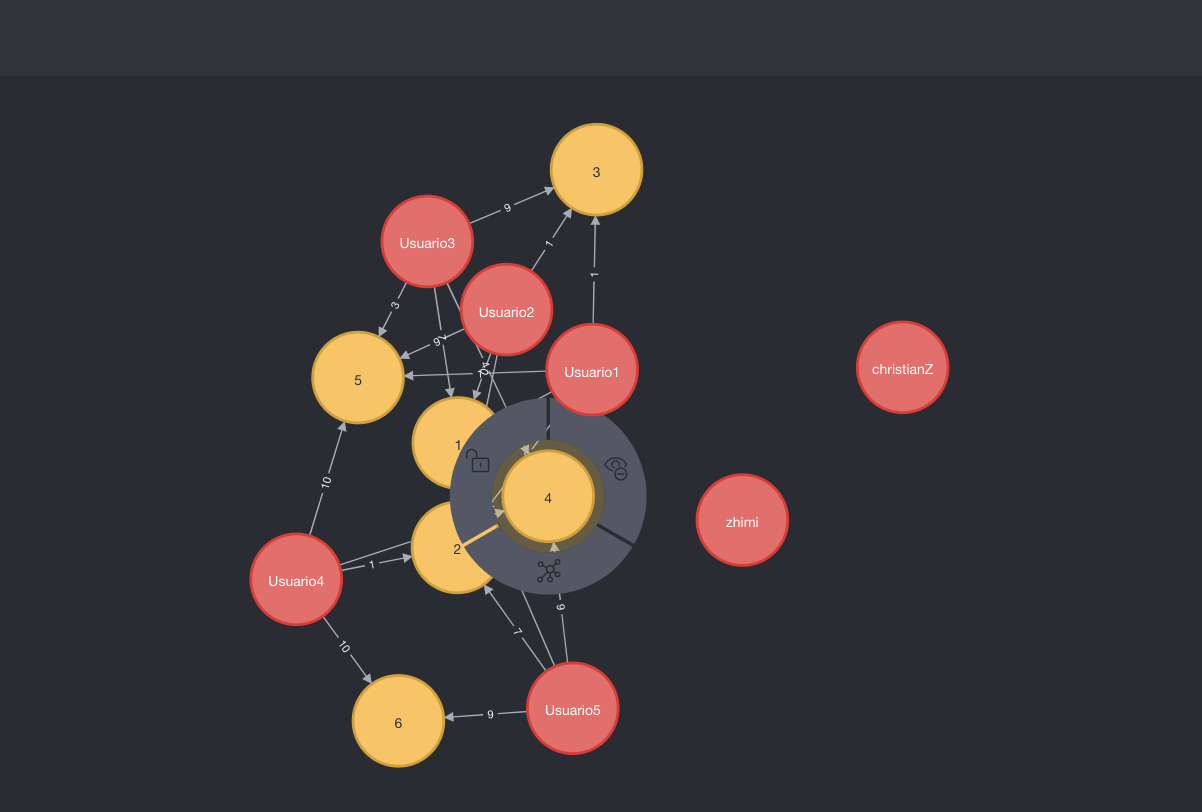

